In [1]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt

In [2]:
def prepare_data(timeseries_data, n_steps):
    X, y = [], []
    for i in range(len(timeseries_data) - n_steps):
        end_of_sample = i + n_steps
        # gather i/p and o/p parts of pattern
        seq_x = timeseries_data[i:end_of_sample]
        seq_y = timeseries_data[end_of_sample]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:
timeseries_data = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]
n_steps = 3
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print('Shape of X_train: ', X.shape)
print('Shape of y_train: ', y.shape)

Shape of X_train:  (17, 3)
Shape of y_train:  (17,)


In [5]:
# reshape from [samples, timesteps] into [samples, timesteps, n_features]
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)

In [6]:
X.shape

(17, 3, 1)

# Model construction and training

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.LSTM(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse')

In [8]:
# to use saved model if saved 
# model = tf.keras.models.load_model('time_series.h5')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 22,097
Trainable params: 22,097
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X, y, epochs=5, verbose=1, shuffle=True)

Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 0.0012
Epoch 2/5
1/1 [==============================] - 0s 24ms/step - loss: 0.0012
Epoch 3/5
1/1 [==============================] - 0s 22ms/step - loss: 0.0011
Epoch 4/5
1/1 [==============================] - 0s 22ms/step - loss: 9.7194e-04
Epoch 5/5
1/1 [==============================] - 0s 25ms/step - loss: 7.9284e-04


# Save model for future use

In [11]:
model.save('time_series.h5')

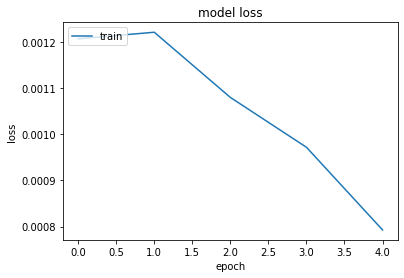

In [12]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Prediction of next 5 series

In [13]:
x_input = np.array(timeseries_data[-3:])
temp_series = list(x_input)
next_series = list()
print(x_input, temp_series)
x_input = x_input.reshape(1, 3, 1)
print('Reshaped input fed: \n', x_input.shape)

[1597 2584 4181] [1597, 2584, 4181]
Reshaped input fed: 
 (1, 3, 1)


In [14]:
model.predict(x_input).shape

1/1 [==============================] - 1s 1s/step


(1, 1)

In [15]:
i = 0
while i<5:
    print('input given for prediction: \n', x_input.tolist())
    y_hat = model.predict(x_input.tolist())
    next_series.append(y_hat[0][0])
    temp_series.append(y_hat[0][0])
    try:
        x_input = np.array(temp_series[-3:])
        x_input = x_input.reshape(1, 3, 1)
    except Exception as E:
        print(E)
    np.append(next_series, y_hat)
    
    print(f'{i} index element is {y_hat}')
    i+=1

input given for prediction: 
 [[[1597], [2584], [4181]]]
1/1 [==============================] - 0s 266ms/step
0 index element is [[6763.3755]]
input given for prediction: 
 [[[2584.0], [4181.0], [6763.37548828125]]]
1/1 [==============================] - 2s 2s/step
1 index element is [[10940.618]]
input given for prediction: 
 [[[4181.0], [6763.37548828125], [10940.6181640625]]]
1/1 [==============================] - 0s 338ms/step
2 index element is [[17697.443]]
input given for prediction: 
 [[[6763.37548828125], [10940.6181640625], [17697.443359375]]]
1/1 [==============================] - 0s 215ms/step
3 index element is [[28625.742]]
input given for prediction: 
 [[[10940.6181640625], [17697.443359375], [28625.7421875]]]
1/1 [==============================] - 0s 203ms/step
4 index element is [[46302.39]]


In [16]:
next_series = [round(x) for x in next_series]

In [17]:
next_series = np.array(next_series)

In [18]:
true_seris = np.array([6765, 10946, 17711, 28657, 46368])
net_differenc = true_seris - next_series
print(net_differenc)

[ 2  5 14 31 66]


# Plotting True Data vs Predicted data

In [19]:
index = np.arange(1, len(timeseries_data)+1)
p_index =np.arange(len(timeseries_data), len(timeseries_data)+5)

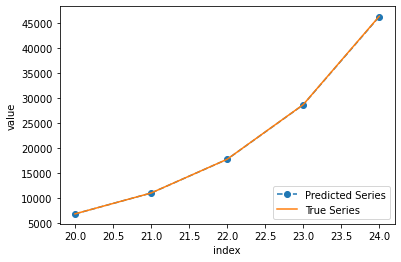

In [20]:
# plt.plot(index, timeseries_data)
#ploting true value vs predicted series
plt.plot(p_index, next_series, 'o--', label='Predicted Series')
plt.plot(p_index, true_seris, label='True Series')
plt.xlabel("index")
plt.ylabel("value")
plt.legend(loc='lower right')
# plt.show()

# 